# **LAB 5 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0 to 1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot $(x,y)$

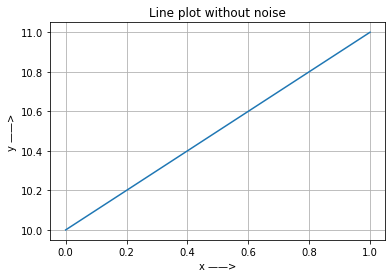

In [44]:
## Write your code here
def f(x, w0, w1):
    y = (w0 + w1*x)
    return y

x = np.linspace(0, 1, 1000)
y = f(x, 10, 1)
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.plot(x, y)
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Line plot without noise")
plt.show()


**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from 0 to 1 with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot $(x, y_{cor})$ (use scatter plot)

(1000,)


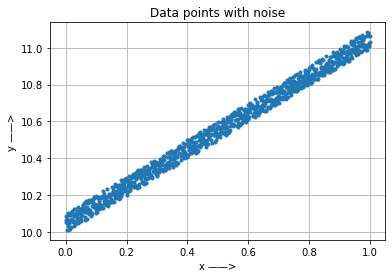

In [45]:
## Write your code here
noise = np.random.uniform(0, 0.1, 1000)

y_cor = y + noise
# print(y_cor)

fig = plt.figure()
ax = plt.axes()
plt.grid()
print(y.shape)

plt.plot(x, y_cor, '.')

# # Using scatter() method uses about 30 seconds. faster to use plot() with
# for i in range(len(x)):
#     plt.scatter(x[i], y_cor[i], color='b')

plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Data points with noise")
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs $search_{w1}$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

Optimal value of w1 is =  1.0780780780780779


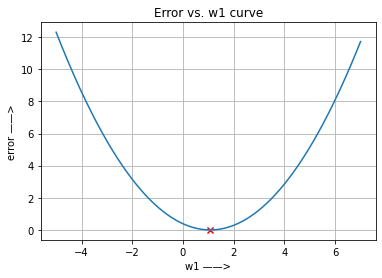

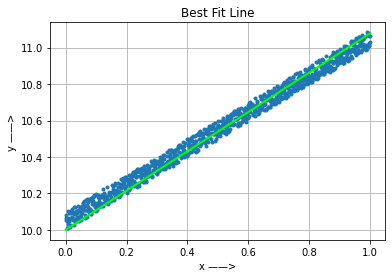

In [46]:
## Write your code here
def error(y, y_cap):
    e = 0
    for i in range(len(y)):
        e += (y[i] - y_cap[i])**2
    e /= len(y)
    return e

w0_const = 10
w1_space = np.linspace(-5, 7, 1000)
y_bestpred = np.zeros(len(y))
least_err = 10000000
err_arr = []
w1_best = 0
for i in w1_space:
    y_pred = f(x, w0_const, i)
    err = error(y_cor, y_pred) #############
    err_arr.append(err)
    if err < least_err:
        y_bestpred = y_pred
        least_err = err
        w1_best = i

print("Optimal value of w1 is = ", w1_best)
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.plot(w1_space, err_arr)
plt.xlabel("w1 ——>")
plt.ylabel("error ——>")
plt.scatter(w1_best, least_err, marker='x', color='red')
plt.title("Error vs. w1 curve")
plt.show()

fig2 = plt.figure()
ax2 = plt.axes()
plt.grid()
plt.plot(x, y_cor, '.')
plt.plot(x, y_bestpred, color='lime', linewidth=2)
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Best Fit Line")
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

Optimal value of w1 (by gradient descent) is =  1.0738465101694505


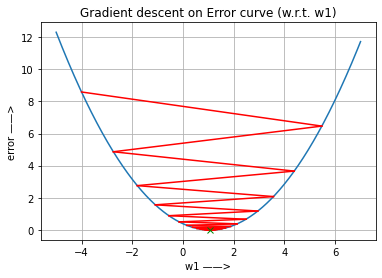

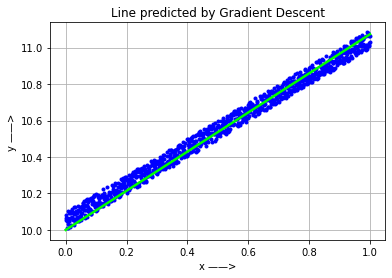

In [47]:
## Write your code here
# Let us use gradient descent to find optimal w1, instead of simply evaluating for all points
# ------------ to plot ------------
# graph1: error vs w1_space
# graph2: x vs y_cor , x vs y_pred

def f_w1(w1):
    return w1*x + w0_const

def grad_desc_w1(y_cor, w1, lam, x):
    return (w1 + ((2*lam/len(x))*np.mean(2*(y_cor - f_w1(w1))*x)))

plt.figure()
plt.grid()
plt.plot(w1_space, err_arr)
w1_init = -4
# lam > 1495 gives too dense graph, and larger values may cause diverging of gradient descent
lam = 1400
n_i = 10000
min_dc = 0.0000001

def error_w1(w1, y):
    return np.mean(np.power(y - f_w1(w1), 2))

w1_prev = w1_init
w1_curr = w1_init
for i in range(n_i):
    w1_prev = w1_curr
    w1_curr = grad_desc_w1(y_cor, w1_prev, lam, x)
    
    plt.plot([w1_prev, w1_curr], [error_w1(w1_prev, y_cor), error_w1(w1_curr, y_cor)], color='red')

    if np.abs(error_w1(w1_curr,y_cor) - error_w1(w1_prev,y_cor)) <= min_dc:
        break

print("Optimal value of w1 (by gradient descent) is = ", w1_curr)
plt.plot(w1_curr, error_w1(w1_curr, y_cor), marker='x', color='g')
plt.xlabel("w1 ——>")
plt.ylabel("error ——>")
plt.title("Gradient descent on Error curve (w.r.t. w1)")
plt.show()

y_bestpred = w1_curr*x + w0_const

plt.figure()
plt.grid()
plt.plot(x, y_cor, '.', color='blue')
plt.plot(x, y_bestpred, color='lime', linewidth=2.5)
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Line predicted by Gradient Descent")
plt.show()


# Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

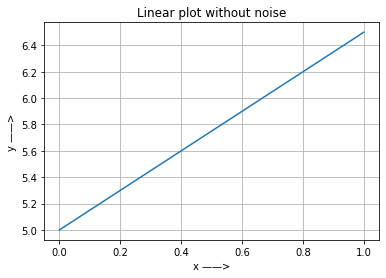

In [48]:
## Write your code here
x = np.linspace(0, 1, 1000)
y = f(x, 5, 1.5)

fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.plot(x, y)
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Linear plot without noise")
plt.show()


**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

(1000,)


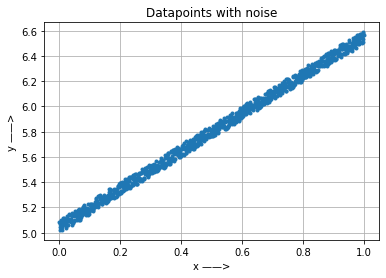

In [49]:
## Write your code here
noise = np.random.uniform(0, 0.1, 1000)

y_cor = y + noise
# print(y_cor)

fig = plt.figure()
ax = plt.axes()
plt.grid()
print(y.shape)

plt.plot(x, y_cor, '.')
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Datapoints with noise")
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

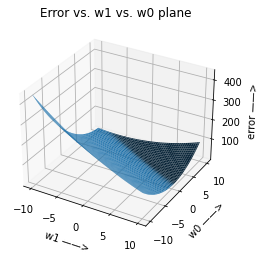

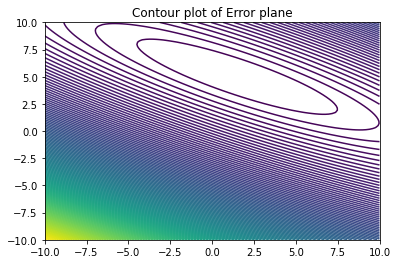

In [50]:
## Write your code here
W0 = np.linspace(-10, 10, 100)
W1 = np.linspace(-10, 10, 100)
w0, w1 = np.meshgrid(W0, W1)

def error(x, w0, w1, y):
    return np.mean((y - f(x, w0, w1))**2)

err_mat = np.ndarray((100, 100))
for i in range(w0.shape[0]):
    for j in range(w1.shape[0]):
        err_mat[i][j] = error(x, w0[i][j], w1[i][j], y)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w0, err_mat)
ax.set_xlabel('w1 ——>')
ax.set_ylabel('w0 ——>')
ax.set_zlabel('error ——>')
plt.title("Error vs. w1 vs. w0 plane")
plt.show()

plt.figure()
ax2 = plt.axes()
ax2.contour(w1, w0, err_mat, 150)
plt.title("Contour plot of Error plane")
plt.show()

**Gradient Descent to find optimal Values**

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $\nabla Error|_{w0}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})$
   
4. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

5. $w_{0}|_{new}=w_{0}|_{old}-\lambda \nabla Error|_{w0}=w_{0}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})$

Optimal value of w0 (by gradient descent) is =  5.047540534015217
Optimal value of w1 (by gradient descent) is =  1.5043003374346726


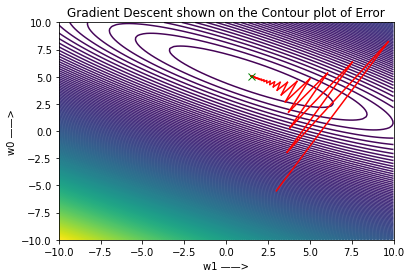

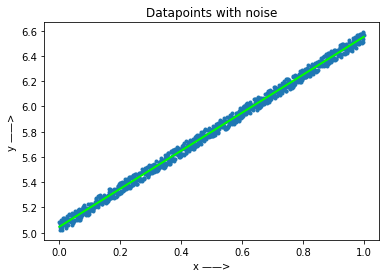

In [51]:
## Write your code here
def f_w1_w0(w1, w0):
    return w1*x + w0

def grad_desc_w1_w2(y_cor, w0, w1, lam, x):
    w1_new = w1 + ((2*lam/len(x))*np.mean(2*(y_cor - f_w1_w0(w1, w0))*x))
    w0_new = w0 + ((2*lam/len(x))*np.mean(2*(y_cor - f_w1_w0(w1, w0))))
    return w0_new, w1_new

w1_init = 3
w0_init = -5.5
lam = 350
n_i = 10000
min_dc = 0.0000001

def error_w1_w0(w1, w0, y):
    return np.mean(np.power(y - f_w1_w0(w1, w0), 2))

plt.figure()
ax2 = plt.axes()
ax2.contour(w1, w0, err_mat, 250)
ax2.set_xlabel('w1 ——>')
ax2.set_ylabel('w0 ——>')

w1_prev = w1_init
w1_curr = w1_init
w0_prev = w0_init
w0_curr = w0_init
for i in range(n_i):
    w1_prev = w1_curr
    w0_prev = w0_curr
    w0_curr, w1_curr = grad_desc_w1_w2(y_cor, w0_prev, w1_prev, lam, x)

    plt.plot([w1_prev, w1_curr], [w0_prev, w0_curr], color='red')

    if np.abs(error_w1_w0(w1_curr, w0_curr, y_cor) - error_w1_w0(w1_prev, w0_prev, y_cor)) <= min_dc:
        break

plt.plot(w1_curr, w0_curr, marker='x', color='g', markersize=7)
print("Optimal value of w0 (by gradient descent) is = ", w0_curr)
print("Optimal value of w1 (by gradient descent) is = ", w1_curr)
plt.title("Gradient Descent shown on the Contour plot of Error")
plt.show()

plt.figure()
y_pred = f_w1_w0(w1_curr, w0_curr)
plt.plot(x, y_cor, '.')
plt.plot(x, y_pred, color='lime', linewidth=2)
plt.xlabel("x ——>")
plt.ylabel("y ——>")
plt.title("Datapoints with noise")
plt.show()


# Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

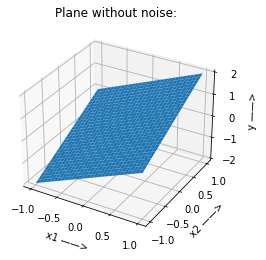

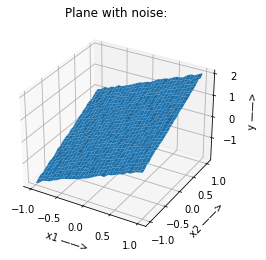

In [52]:
## Write your code here
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)
x1, x2 = np.meshgrid(x1, x2)
w0_const = 0

def f_x1_x2(w1, w2):
    return w0_const + w1*x1 + w2*x2 

# let f(x1, x2) = x1 + x2
w1 = 1 
w2 = 1
y = f_x1_x2(w1, w2)
noise = np.random.uniform(0, 0.1, y.shape)
y_cor = y + noise

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, y)
ax.set_xlabel('x1 ——>')
ax.set_ylabel('x2 ——>')
ax.set_zlabel('y ——>')
plt.title("Plane without noise:")
plt.show()

plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot_surface(x1, x2, y_cor)
ax2.set_xlabel('x1 ——>')
ax2.set_ylabel('x2 ——>')
ax2.set_zlabel('y ——>')
plt.title("Plane with noise:")
plt.show()


**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

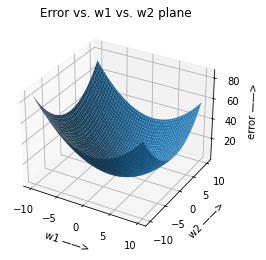

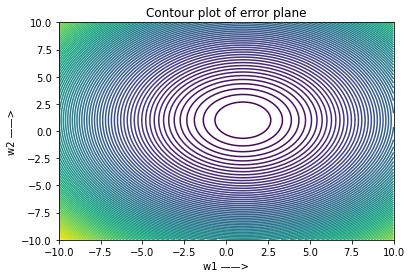

In [53]:
## Write your code here
def error_w1_w2(w1, w2, y):
    return np.mean(np.power(y - f_x1_x2(w1, w2), 2))

W1 = np.linspace(-10, 10, 100)
W2 = np.linspace(-10, 10, 100)
w1, w2 = np.meshgrid(W1, W2)

err_mat = np.ndarray((100, 100))
for i in range(w1.shape[0]):
    for j in range(w2.shape[0]):
        err_mat[i][j] = error_w1_w2(w1[i][j], w2[i][j], y_cor)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, err_mat)
ax.set_xlabel('w1 ——>')
ax.set_ylabel('w2 ——>')
ax.set_zlabel('error ——>')
plt.title("Error vs. w1 vs. w2 plane")
plt.show()

plt.figure()
plt.contour(w1, w2, err_mat, 100)
plt.xlabel('w1 ——>')
plt.ylabel('w2 ——>')
plt.title("Contour plot of error plane")
plt.show()

**Prediction using Gradient Descent**

Optimal value of w0 (by gradient descent) is =  0.9999199936039499
Optimal value of w1 (by gradient descent) is =  0.9999264690592468


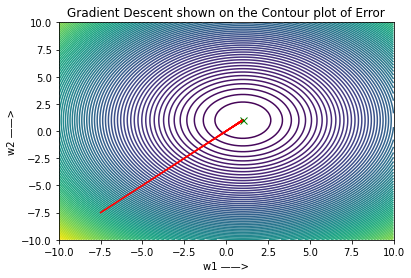

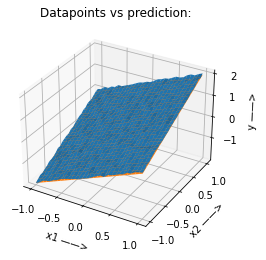

In [54]:
## Write your code here

def grad_desc_x1_x2(y_cor, w1, w2, lam, x):
    w1_new = w1 + ((2*lam/len(x))*np.mean(2*(y_cor - f_x1_x2(w1, w2))*x1))
    w2_new = w2 + ((2*lam/len(x))*np.mean(2*(y_cor - f_x1_x2(w1, w2))*x2))
    return w1_new, w2_new

w1_init = -7.5
w2_init = -7.5
lam = 10
n_i = 10000
min_dc = 0.0000001

plt.figure()
ax2 = plt.axes()
ax2.contour(w1, w2, err_mat, 100)
ax2.set_xlabel('w1 ——>')
ax2.set_ylabel('w2 ——>')

w1_prev = w1_init
w1_curr = w1_init
w2_prev = w2_init
w2_curr = w2_init
for i in range(n_i):
    w1_prev = w1_curr
    w2_prev = w2_curr
    w2_curr, w1_curr = grad_desc_x1_x2(y_cor, w1_prev, w2_prev, lam, x)

    plt.plot([w1_prev, w1_curr], [w2_prev, w2_curr], color='red')

    if np.abs(error_w1_w2(w1_curr, w2_curr, y_cor) - error_w1_w2(w1_prev, w2_prev, y_cor)) <= min_dc:
        break

plt.plot(w1_curr, w2_curr, marker='x', color='g', markersize=7)
print("Optimal value of w0 (by gradient descent) is = ", w2_curr)
print("Optimal value of w1 (by gradient descent) is = ", w1_curr)
plt.title("Gradient Descent shown on the Contour plot of Error")
plt.show()

plt.figure()
ax2 = plt.axes(projection='3d')
y_pred = f_x1_x2(w1_curr, w2_curr)
ax2.plot_surface(x1, x2, y_cor)
ax2.plot_surface(x1, x2, y_pred)
ax2.set_xlabel('x1 ——>')
ax2.set_ylabel('x2 ——>')
ax2.set_zlabel('y ——>')
plt.title("Datapoints vs prediction:")
plt.show()


### Fitting of M-dimensional hyperplane (M-dimension, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x_1, x_2, x_3,...,x_M$. in vector form we can write $[x_1,x_2,...,x_M]^{T}$, and similarly the weights are $w_1, w_2, ...w_M$ can be written as a vector $[w_1,w_2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w_1 x_1 + w_2 x_2 +...+ w_M x_M$$

$w_1, w_2,....,w_M$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x_1,x_2,...,x_{M}]^{T}$ and the weight matrix is $[w_0,w_1,w_2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w_1x_1+w_2x_2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:** $\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

### TO DO:
1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

Dimensions of data =  (5, 1000)
Dimensions of weight matrix =  (6, 1)
Dimensions of data after augmenting x0 =  (6, 1000)
Dimensions of y =  (1000, 1)
[[ 0.04935086]
 [ 0.00166092]
 [-0.00016897]
 [-0.0015852 ]
 [-0.00036865]
 [-0.00095985]]
[[ 0.04934915]
 [ 0.00164249]
 [-0.00015817]
 [-0.00154407]
 [-0.000409  ]
 [-0.00093509]]


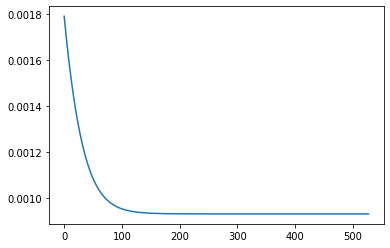

In [55]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + (2*lr/y.shape[0]) * (x @ (y - (x.T @ w_old)))
    return w

  def error(self,w,y,x):
    return np.sum(np.power((y - x.T @ w), 2))**0.5/y.shape[0]

  def mat_inv(self,y,x_aug):
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_aug,x_aug.T)),x_aug),y)    # W_opt, basically
    
  # By Gradient descent

  def Regression_grad_des(self,x,y,lr):
    w_old=np.zeros((x.shape[0],1))
    err=[]
    while(1):
        w=self.grad_update(w_old=w_old,lr=lr,y=y,x=x)
        err.append(self.error(w,y,x))
        dev=np.abs(self.error(w,y,x)-self.error(w_old,y,x))
        if dev<=10**-11:
            w_old=w
            break
        w_old=w
    return w_old,err    
    # err_arr = []
    # if(not w_choose):
    #   w_init = np.zeros((x.shape[0], 1)) # M x 1
    # else:
    #   w_init = np.array([20000, 2000, 100, 2, 300, 5000])    
    # w_prev = w_init
    # w_curr = w_init
    # for i in range(1000):
      
    #   w_curr = self.grad_update(w_curr, lr, y, x)

    #   err = self.error(w_curr, y, x)
    #   err_prev = self.error(w_prev, y, x)
    #   err_arr.append(err)
    #   dev = np.abs(err - err_prev)

    #   w_prev = w_curr

    #   if dev<=0.000001:
    #     break
    # w_pred = w_curr
    # err = err_arr
    
    # return w_pred, err


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000

x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print("Dimensions of data = ", x.shape) # M x N-1 ; each FV is 1 x N-1 here.

w = np.zeros((x.shape[0]+1,1)) ## Write your code here (Initialise the weight matrix) (W=[w0,w1,.....,wM]')
print("Dimensions of weight matrix = ", w.shape) # M x 1

## Augment the Input
x_aug = np.r_[np.ones((1,x.shape[1])),x] ## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print("Dimensions of data after augmenting x0 = ", x_aug.shape) # M x N

y = x_aug.T @ w  # vector multiplication
print("Dimensions of y = ", y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# By Gradient descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)


# Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

### Reading data from CSV file

In [56]:
## Write your code here

import csv
rows = []
with open('salary_pred_data.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(header)
print(rows[0:5])


['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile', 'Salary']
[['2', '11', '34', '4', '3', '41368'], ['4', '14', '28', '1', '4', '49756'], ['1', '13', '55', '3', '2', '34310'], ['4', '19', '47', '1', '7', '65294'], ['2', '10', '24', '2', '6', '55648']]


In [57]:
import pandas as pd
# from sklearn.preprocessing import StandardScaler
df=pd.read_csv('salary_pred_data.csv')
print(df.head(5))
array=df.iloc[:,:].values

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x = np.column_stack((np.ones((x.shape[0], 1)), x))

   Level of city  Years of experiance  Age  Level of education  Job profile  \
0              2                   11   34                   4            3   
1              4                   14   28                   1            4   
2              1                   13   55                   3            2   
3              4                   19   47                   1            7   
4              2                   10   24                   2            6   

   Salary  
0   41368  
1   49756  
2   34310  
3   65294  
4   55648  


### Test-Train Split (90% Training, 10% Set)

In [58]:
from sklearn.model_selection import train_test_split
data_tr, data_te = train_test_split(df, test_size=0.1)

### Compute optimal weight values, and do salary prediction using above-described methods

In [59]:
train_target = data_tr["Salary"]
test_target = data_te["Salary"]
train_dataset = data_tr.drop(["Salary"],axis=1)
test_dataset = data_te.drop(["Salary"],axis=1)

x_train = train_dataset.iloc[:].values.T
y_train = train_target.iloc[:].values
x_test = test_dataset.iloc[:].values.T
y_test = test_target.iloc[:].values

x_train = np.r_[np.ones((1,x_train.shape[1])),x_train]
x_test = np.r_[np.ones((1,x_test.shape[1])),x_test]

our = regression()
w_opt_matrix = our.mat_inv(y_train,x_train)
# print(x_test.shape)
print("Matrix obtained by our method = ",w_opt_matrix)
y_predicted = np.matmul(x_test.T,w_opt_matrix)
def error(y, y_cap):
    e = 0
    for i in range(len(y)):
        e += (y[i] - y_cap[i])**2
    e /= len(y)
    return e
print(error(y_predicted, y_test))



from sklearn.linear_model import LinearRegression
# print(x_train[1:,:].shape)
model = LinearRegression().fit(x_train[1:,:].T,y_train)
print("Matrix obtained by sklearn",model.coef_)
y_pred = model.predict(x_test[1:,:].T)
print(error(y_test, y_pred))

Matrix obtained by our method =  [2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
1.739932199206829e-18
Matrix obtained by sklearn [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
4.941907851636809e-22


In [64]:

print(x_train.shape)

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt = reg.mat_inv(y_train, x_train)
print("By Matrix Inversion method, w_opt = " ,w_opt)


(6, 900)
By Matrix Inversion method, w_opt =  [2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]


### Mean Squared Error using the model



In [67]:
print(reg.error(w_opt, y_test, x_test))

1.3190648957526043e-10


### Using scikit learn

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train[1:,:].T, y_train)
y_cap = model.predict(x_test[1:,:].T)
error = np.std(y_cap - y_test)
print("Error = ", error)
print("Coefficients generated by sklearn = ", model.coef_)
# here w0 isn't considered

Error =  2.1493774850973386e-11
Coefficients generated by sklearn =  [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]


In [75]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_cap))

4.941907851636809e-22
